# Laboratorium 1


### Konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

<IPython.core.display.Javascript object>


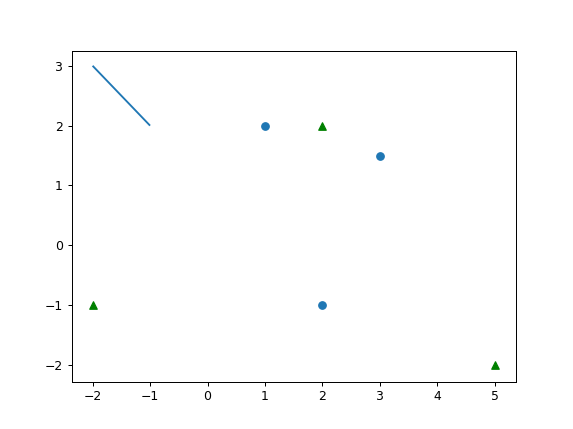

In [3]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

### Rozwiązanie

In [4]:
signs = [-1, 1]
import random
def generatePoints(nr, valRange):
    points = []
    for i in range(0, nr):
        point = (random.random()*valRange*random.choice(signs), random.random()*valRange*random.choice(signs))
        points.append(point)
    return points


In [5]:
import math
import random
signs = [-1, 1]

def generateOnLine(nr, ran=1000):
    points = []
    a = [-1.0, 0.0]
    b = [1.0, 0.1]
    m = (b[1]-a[1])/(b[0]-a[0])
    c = a[1] - a[0]*m
    for i in range(0, nr):
        x = random.random()*ran*random.choice(signs)
        y = m*x + c
        points.append((x,y))
    return points


In [6]:
import math
signs = [-1, 1]

def generateOnCircle(nr, R=1):
    points = []
    for i in range(0, nr):
        t = random.random()
        x = math.cos(math.pi/2*t)*R*random.choice(signs)
        y = math.sin(math.pi/2*t)*R*random.choice(signs)
        
        points.append((x,y))
    return points


In [7]:
# Podpunkt 1: Tworzę zadane wzory  
setA = generatePoints(10**5, 1000)
setB = generatePoints(10**5, 10**14)
setC = generateOnCircle(1000, R=100)
setD = generateOnLine(1000)

<IPython.core.display.Javascript object>


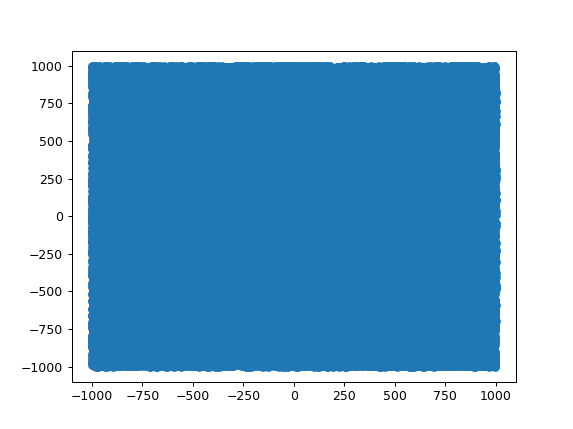

In [8]:
# Podpunkt 2: graficzna reprezentacja wszystkich zbiorów
%matplotlib notebook

plot = Plot([PointsCollection(setA)])
plot.draw()

<IPython.core.display.Javascript object>


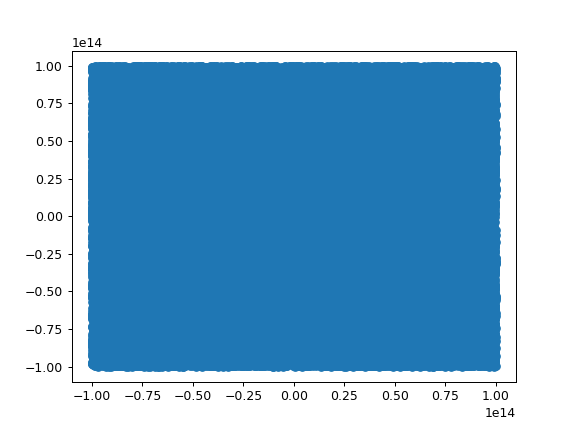

In [9]:
%matplotlib notebook

plot = Plot([PointsCollection(setB)])
plot.draw()

<IPython.core.display.Javascript object>


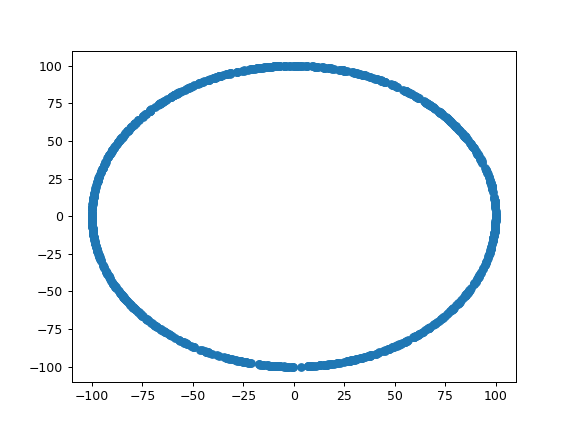

In [10]:
%matplotlib notebook

plot = Plot([PointsCollection(setC)])
plot.draw()

<IPython.core.display.Javascript object>


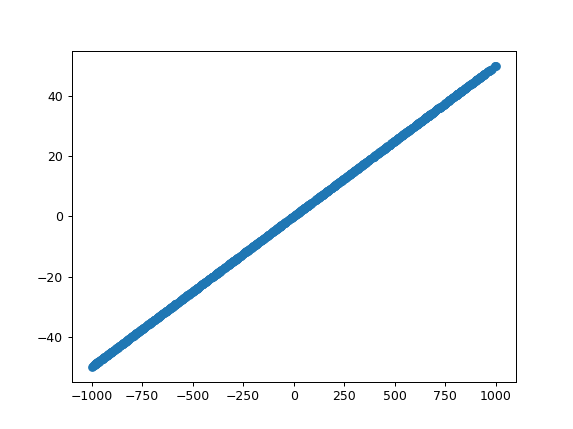

In [11]:
%matplotlib notebook

plot = Plot([PointsCollection(setD)])
plot.draw()

In [12]:
# Podpunkt 3: Funkcje pomocnicze wyznaczające orientacje punktu c względem odcinka ab, 
# używając dwóch różnych metod wyznaczania wyznaczników i przybliżenia dokładności eps

def pos1(c, eps):
    a = (-1.0, 0.0, 1)
    b = (1.0, 0.1, 1)
    c = (c[0], c[1], 1)
    det = a[0] * b[1] * c[2] + a[1] * b[2] * c[0] + a[2] * b[0] * c[1] - a[2] * b[1] * c[0] - a[1] * b[0] * c[2] - a[
        0] * b[2] * c[1]
    if det < -eps:
        return Orientation.right
    if det > eps:
        return Orientation.left
    return Orientation.coll

def pos2(c, eps):
    a = (-1.0, 0.0)
    b = (1.0, 0.1)
    ca = (a[0] - c[0], a[1] - c[1])
    cb = (b[0] - c[0], b[1] - c[1])
    det = ca[0] * cb[1] - ca[1] * cb[0]
    if det < -eps:
        return Orientation.right
    if det > eps:
        return Orientation.left
    return Orientation.coll


In [13]:
import enum
class Orientation(enum.Enum):
    left=0
    right=1
    coll=2

In [14]:
# Funkcja zwracająca dla podanego zbioru punkty znajdujące się po lewej, prawej i na przedłużeniu
# odcinka ab, używając 1 metody liczenia wyznacznika

def pointSplit1(setX, eps):
    setL = []
    setR = []
    setC = []
    for point in setX:
        if pos1(point, eps) == Orientation.left:
            setL.append(point)
        elif pos1(point, eps) == Orientation.right:
                setR.append(point)
        else:
            setC.append(point)
    return [setL, setR, setC]



In [15]:
# Funkcja zwracająca dla podanego zbioru punkty znajdujące się po lewej, prawej i na przedłużeniu
# odcinka ab, używając 2 metody liczenia wyznacznika

def pointSplit2(setX, eps):
    setL = []
    setR = []
    setC = []
    for point in setX:
        if pos2(point, eps) == Orientation.left:
            setL.append(point)
        elif pos2(point, eps) == Orientation.right:
                setR.append(point)
        else:
            setC.append(point)
    return [setL, setR, setC]



In [16]:
# funkcja pomocnicza wyświetlająca różnice w wynikach między 2 funkcjami, dla 5 różnych precyzji
import numpy

def count_split_for_eps(eps, setX):
    x = eps
    for eps in numpy.arange(0.0, x, x/5):
        print("\n epsilon:", eps)
        res1 = pointSplit1(setX, eps)
        res2 = pointSplit2(setX, eps)
        len1 = [ len(x) for x in res1]
        len2 = [ len(x) for x in res2]
        print("1st method: left: %d right: %d, middle: %d" %(len1[0], len1[1], len1[2]))
        print("2nd method: left: %d right: %d, middle: %d" %(len2[0], len2[1], len2[2]))


In [17]:
# zestawienie podziału punktów dla różnych precyzji obliczeń 
x =1e-1

print("Set A (points evenly distributed) ")
count_split_for_eps(x, setA)

x =1e-1
print("\n Set B (points evenly distributed with large coordinates) ")
count_split_for_eps(x, setB)

x =1e-1
print("\n Set C (points on a circle) ")
count_split_for_eps(x, setC)

x =1e-11
print("\n Set D (points on a line) ")
count_split_for_eps(x, setD)

# wniosek : druga metoda jest dokladniejsza


Set A (points evenly distributed) 

 epsilon: 0.0
1st method: left: 49647 right: 50353, middle: 0
2nd method: left: 49647 right: 50353, middle: 0

 epsilon: 0.02
1st method: left: 49647 right: 50353, middle: 0
2nd method: left: 49647 right: 50353, middle: 0

 epsilon: 0.04
1st method: left: 49642 right: 50352, middle: 6
2nd method: left: 49642 right: 50352, middle: 6

 epsilon: 0.06
1st method: left: 49642 right: 50352, middle: 6
2nd method: left: 49642 right: 50352, middle: 6

 epsilon: 0.08
1st method: left: 49641 right: 50351, middle: 8
2nd method: left: 49641 right: 50351, middle: 8

 Set B (points evenly distributed with large coordinates) 

 epsilon: 0.0
1st method: left: 50224 right: 49776, middle: 0
2nd method: left: 50223 right: 49775, middle: 2

 epsilon: 0.02
1st method: left: 50224 right: 49776, middle: 0
2nd method: left: 50223 right: 49775, middle: 2

 epsilon: 0.04
1st method: left: 50224 right: 49776, middle: 0
2nd method: left: 50223 right: 49775, middle: 2

 epsilon: 

1000
855


<IPython.core.display.Javascript object>


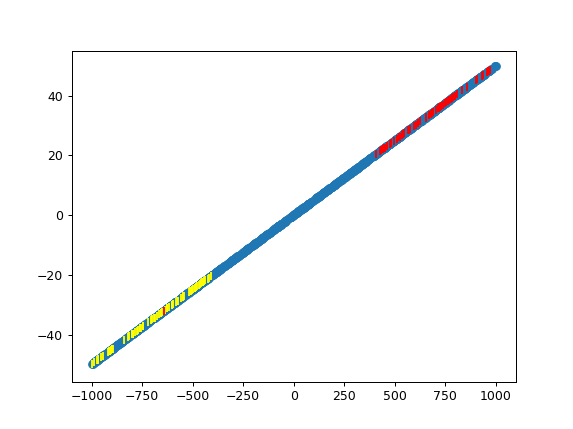

In [18]:
%matplotlib notebook
# reprezentacja graficzna różnic w podziale punktów dla zbioru D (tu różnice są najbardziej widoczne): 
# punkty z metody 1 zostały wszystkie przyporządkowane 
# jako leżące na prostej(niebieski), na żółto są zaznaczone punkty leżące po lewej, a na czerwono - po prawej 
# od prostej wyznaczonej przez ab według 2 metody (punkty przyporządkowane do prostej nie są wyświetalne 
# dla przejrzystości wykresu)
eps =1e-12
setDdiv1 = pointSplit1(setD, eps)
setDdiv2 = pointSplit2(setD, eps)
print(len(setDdiv1[2]))
print(len(setDdiv2[2]))

plot = Plot([PointsCollection(setDdiv1[2]), 
             PointsCollection(setDdiv2[0], color = 'yellow', marker = "|"),
            PointsCollection(setDdiv2[1], color = 'red', marker = "|")], 
            )
plot.draw()